# Metrics

In [ ]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

## Accuracy

## Recall

## Precision

## F1 Score

## Confusion Matrix

## ROC Curve

In [ ]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
df = pd.read_csv(url)

In [ ]:
df

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


<AxesSubplot: xlabel='balance', ylabel='default'>

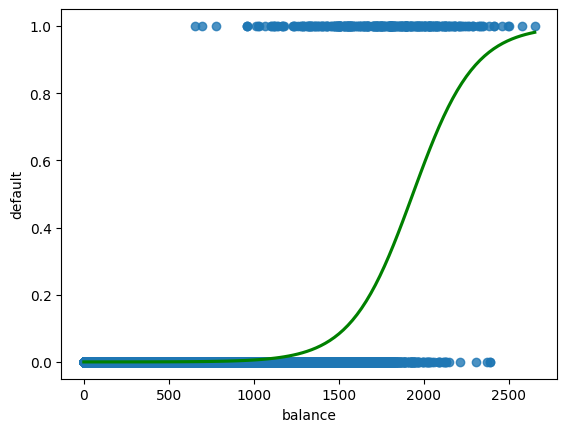

In [ ]:
#define the predictor variable and the response variable
x = df['balance']
y = df['default']

#plot logistic regression curve
sns.regplot(x=x, y=y, data=df, logistic=True, ci=None, line_kws={'color': 'green'})

In [ ]:
def logistic(x: float) -> float:
    return 1.0 / (1 + np.exp(-x))

In [ ]:
def sigmoid(x):
    "Numerically-stable sigmoid function."
    if x >= 0:
        z = math.exp(-x)
        return 1 / (1 + z)
    else:
        z = math.exp(x)
        return z / (1 + z)

In [ ]:
1.0 / (1 + math.exp(-10))

0.9999546021312976

In [ ]:
# [sigmoid(x) for x in xs]

In [ ]:
df.iloc[0::10]

,default,student,balance,income
0,0,0,729.526495,44361.625074
10,0,1,0.000000,21871.073089
20,0,0,228.952550,50500.182198
30,0,0,494.816229,54384.782836
40,0,0,872.138680,41787.567269
...,...,...,...,...
9950,0,0,879.624128,33682.186158
9960,0,1,826.741213,18856.900030
9970,0,1,1294.500408,25687.326050
9980,0,1,770.015741,13684.789952


In [ ]:
sigmoid(xs)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
xs

0        729.526495
100     1422.018488
200      706.161028
300        0.000000
400      639.820558
           ...     
9500    2046.639515
9600      58.751205
9700     719.554054
9800    1209.652028
9900    1695.387238
Name: balance, Length: 100, dtype: float64

In [ ]:
def logistic(x, k, bias) -> float:
    x_mean = x.mean()
    return 1.0 / ((1 + np.exp((-k * (x - x_mean)) - bias)))

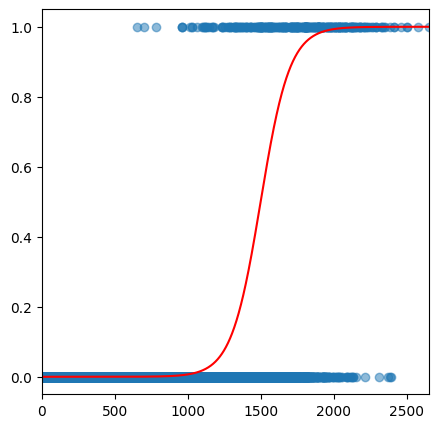

In [ ]:
from scipy import interpolate

fig, ax = plt.subplots(figsize=(5, 5))
xs = df['balance']
ys = df['default']
ax.scatter(xs, ys, alpha=0.5)

curve_xs = np.arange(0, 10000, 1)
bspline = interpolate.make_interp_spline(curve_xs, logistic(curve_xs, 0.01, 35))
curve_ys = bspline(curve_xs)
ax.plot(curve_xs, curve_ys, color='red')
ax.set_xlim(0, max(xs))
plt.show()

In [ ]:
np.linspace(0, 5, 100)

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

<function matplotlib.pyplot.show(close=None, block=None)>

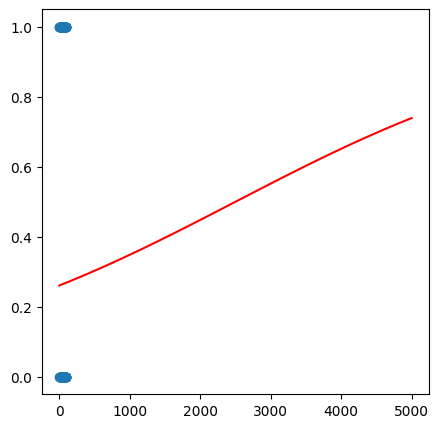

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
xs = np.arange(0, 100, 1)
ys = np.random.randint(0, 2, 100)
ax.scatter(xs, ys)
curve_xs = np.linspace(0, 5000, 100)
bspline = interpolate.make_interp_spline(curve_xs, logistic(curve_xs, 1/2400, 0))
curve_ys = bspline(curve_xs)
ax.plot(curve_xs, curve_ys, color='red')
# ax.set_xlim(0, max(xs))
plt.show

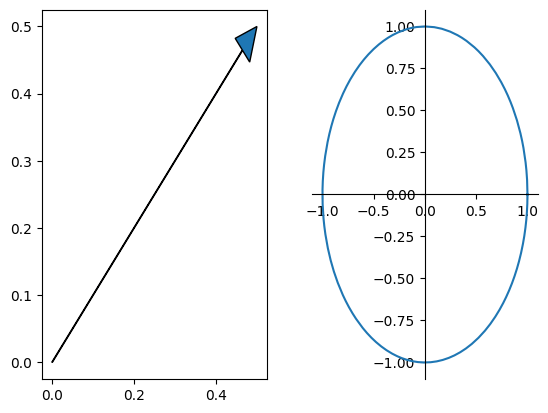

In [ ]:
import matplotlib.pyplot as plt

from sympy.plotting.plot import plot_parametric
from sympy import *
from sympy.abc import x,y,z

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    # Fix for > sympy v1.5
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

p2 = plot_parametric(cos(x), sin(x), (x, 0, 2*pi), show=False)

fig, (ax, ax2) = plt.subplots(ncols=2)

ax.arrow(0,0,0.5,0.5,head_width = 0.05, head_length=0.05,length_includes_head=True)
move_sympyplot_to_axes(p2, ax2)

plt.show()